# Packages to be used

In [19]:
import numpy              as np
import pandas             as pd
import matplotlib.pyplot  as plt
import seaborn            as sns
import glob
import time
import os
from mpl_toolkits.mplot3d import Axes3D

# Paths

In [20]:
figs_path  = '../../Codes/Model/Results/'
probs_path = '../../LargeFilesResults/'

# Files to be used in the analysis

In [21]:
all_files = os.listdir(path=probs_path)

In [22]:
all_files

['rm_sharedprior_prob01.csv',
 'rm_sharedprior_prob04.csv',
 'fit_summary_rm_sharedprior.csv',
 'rm_sharedprior_prob05.csv',
 'rm_sharedprior_prob02.csv',
 'entirefit_rm_sharedpriors.csv',
 'prob05_rmshared_stats.csv',
 'prob02_rmshared_stats.csv',
 'rm_sharedprior_prob03.csv',
 'prob03_rmshared_stats.csv',
 'betas_rm_sharedprior.csv',
 'prob04_rmshared_stats.csv',
 'Model',
 'SEDFitting',
 'prob01_rmshared_stats.csv']

In [23]:
probs_files = []
for i in range(len(all_files)):
    prefix = all_files[i].split('.')[0]
    if prefix[:5] == 'prob0':
        probs_files.append(all_files[i])
    else:
        continue
probs_files = np.array(probs_files)
probs_files = np.sort(probs_files)

In [24]:
probs_files

array(['prob01_rmshared_stats.csv', 'prob02_rmshared_stats.csv',
       'prob03_rmshared_stats.csv', 'prob04_rmshared_stats.csv',
       'prob05_rmshared_stats.csv'], dtype='<U25')

# Plots

In [25]:
%matplotlib notebook

In [7]:
# stellar_mass_ini = float(input("Minimum mass?"))

Minimum mass?11


In [8]:
# stellar_mass_fin = float(input("Maximum mass?"))

Maximum mass?11


In [35]:
print (np.unique(prob_temp['LOG_STELLAR_MASS'].values))

[ 9.          9.10526316  9.21052632  9.31578947  9.42105263  9.52631579
  9.63157895  9.73684211  9.84210526  9.94736842 10.05263158 10.15789474
 10.26315789 10.36842105 10.47368421 10.57894737 10.68421053 10.78947368
 10.89473684 11.        ]


In [26]:
figsize      = (20, 5)
whan_classes = ['Not classified', 'Retired/Passive', 'wAGN', 'sAGN', 'SF']
# palette      = ['#e41a1c', '#ff7f00', '#4daf4a', '#377eb8','#984ea3']
palette      = ['grey', '#a6611a','#dfc27d','#80cdc1','#018571']
alpha        = 0.4
fontsize = 15
xlim = [0.05, .36]
ylim = [0, 1.]

<IPython.core.display.Javascript object>


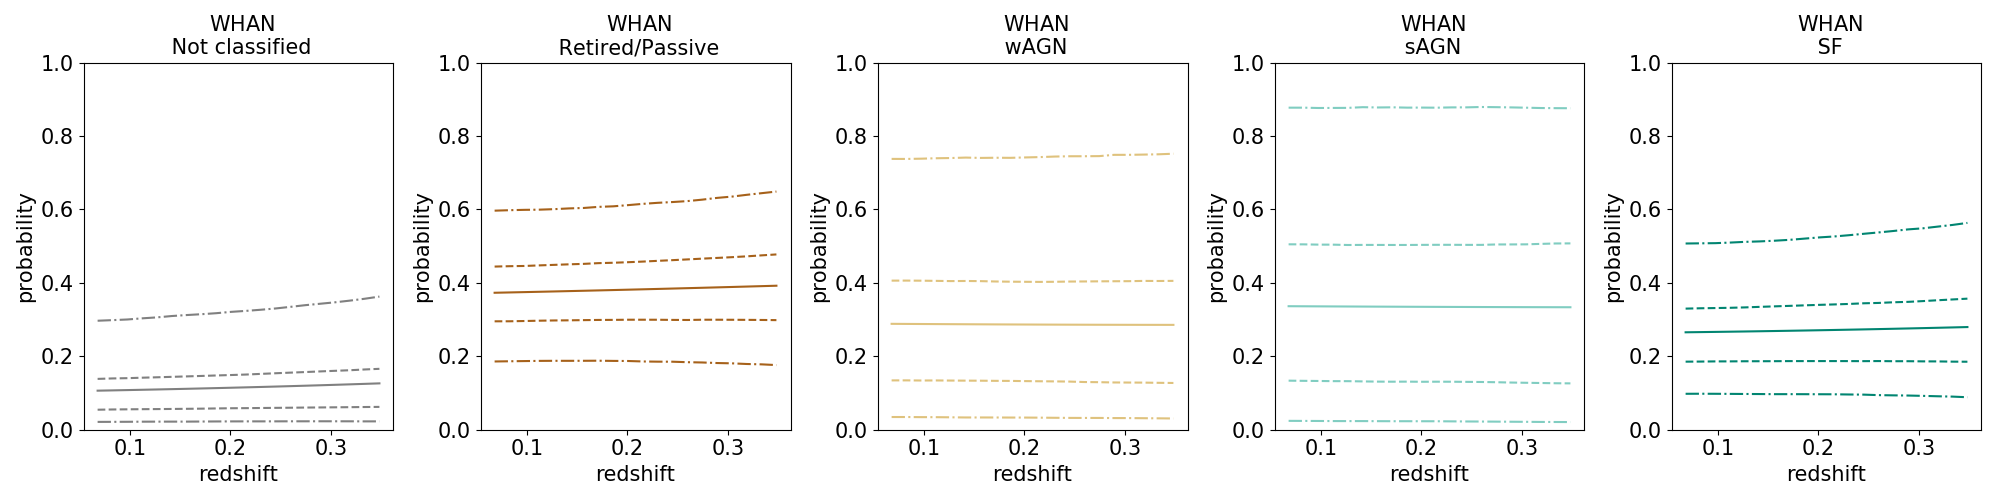

In [38]:
rows     = 1
cols     = probs_files.size
position = 0
plt.subplots(figsize=figsize)
for i in range(cols):
    prob_temp      = pd.read_csv(os.path.join(probs_path, probs_files[i]))
#     data_slice_idx = np.where((prob_temp['LOG_STELLAR_MASS'].values>=stellar_mass_ini)*
#                               (prob_temp['LOG_STELLAR_MASS'].values<=stellar_mass_fin))
    data_slice_idx = np.where(prob_temp['LOG_STELLAR_MASS'].values==9)
    redshift = prob_temp['Z'].values[data_slice_idx]
    mean     = prob_temp['mean'].values[data_slice_idx]
    perc025  = prob_temp['2.5%'].values[data_slice_idx]
    perc250  = prob_temp['25%'].values[data_slice_idx]
    perc500  = prob_temp['50%'].values[data_slice_idx]
    perc750  = prob_temp['75%'].values[data_slice_idx]
    perc975  = prob_temp['97.5%'].values[data_slice_idx]
    position+=1
    plot = plt.subplot(rows, cols, position)
    plt.plot(redshift, mean, '-', color=palette[i])
    plt.plot(redshift, perc025, '-.', color=palette[i])
    plt.plot(redshift, perc250, '--', color= palette[i])
    plt.plot(redshift, perc750, '--', color=palette[i])
    plt.plot(redshift, perc975, '-.', color=palette[i])
    plt.title("$\,$ WHAN \n %s" % whan_classes[i], fontsize=fontsize)
    plt.xlabel("redshift", fontsize=fontsize)
    plt.ylabel("probability", fontsize=fontsize)
    plt.tick_params('both', labelsize=fontsize)
    plt.ylim(ylim)
plt.tight_layout()
plt.savefig(os.path.join(figs_path, 'probs_temp_rm.png'))
plt.show()

In [28]:
prob_temp

Unnamed: 0  probs    median      mean       std      2.5%       25%  \
0             0      0  0.252441  0.265338  0.106847  0.097842  0.185364   
1             1      1  0.253082  0.265858  0.107144  0.098005  0.185607   
2             2      2  0.253691  0.266401  0.107508  0.097858  0.186068   
3             3      3  0.254155  0.266970  0.107940  0.097605  0.186128   
4             4      4  0.254908  0.267563  0.108442  0.097339  0.186453   
5             5      5  0.255297  0.268181  0.109012  0.097151  0.186523   
6             6      6  0.255471  0.268824  0.109653  0.096839  0.186657   
7             7      7  0.255827  0.269493  0.110364  0.096863  0.186880   
8             8      8  0.256304  0.270187  0.111146  0.096756  0.186890   
9             9      9  0.256965  0.270907  0.111999  0.096622  0.186932   
10           10     10  0.257532  0.271653  0.112924  0.096505  0.186930   
11           11     11  0.258665  0.272426  0.113922  0.095957  0.186870   
12           12     12  0.258915  0.273226  0.114992  0.095576  0.186753   
13           13     13  0.259181  0.274053  0.116135  0.094212  0.186985   
14           14     14  0.259539  0.274907  0.117351  0.093596  0.186569   
15           15     15  0.259940  0.275790  0.118642  0.093103  0.186596   
16           16     16  0.260155  0.276700  0.120006  0.092177  0.186164   
17           17     17  0.260691  0.277640  0.121444  0.091100  0.186034   
18           18     18  0.261154  0.278608  0.122956  0.090177  0.185415   
19           19     19  0.262206  0.279606  0.124543  0.088461  0.185180   
20           20     20  0.259208  0.270634  0.102733  0.106468  0.194180   
21           21     21  0.259621  0.271152  0.102992  0.106876  0.194603   
22           22     22  0.260160  0.271694  0.103323  0.106851  0.194926   
23           23     23  0.260788  0.272261  0.103727  0.106656  0.195063   
24           24     24  0.261478  0.272852  0.104205  0.106276  0.195122   
25           25     25  0.261795  0.273469  0.104756  0.106071  0.195431   
26           26     26  0.262413  0.274111  0.105382  0.105924  0.195681   
27           27     27  0.262673  0.274778  0.106083  0.105458  0.195845   
28           28     28  0.263313  0.275471  0.106860  0.104654  0.195679   
29           29     29  0.263925  0.276190  0.107713  0.105144  0.195587   
..          ...    ...       ...       ...       ...       ...       ...   
370         370    370  0.401656  0.400186  0.090194  0.217926  0.339826   
371         371    371  0.402759  0.400889  0.090330  0.218160  0.340921   
372         372    372  0.403623  0.401612  0.090600  0.218061  0.341250   
373         373    373  0.404412  0.402356  0.091009  0.217429  0.341868   
374         374    374  0.405262  0.403120  0.091559  0.217417  0.341887   
375         375    375  0.406180  0.403905  0.092253  0.217654  0.342158   
376         376    376  0.407338  0.404710  0.093093  0.216949  0.342456   
377         377    377  0.408157  0.405536  0.094080  0.215335  0.342041   
378         378    378  0.409208  0.406384  0.095215  0.215012  0.341883   
379         379    379  0.410200  0.407252  0.096498  0.213965  0.341335   
380         380    380  0.402710  0.402905  0.100892  0.207968  0.332453   
381         381    381  0.403283  0.403416  0.099941  0.209333  0.333579   
382         382    382  0.404023  0.403946  0.099068  0.210360  0.334987   
383         383    383  0.404670  0.404494  0.098277  0.211436  0.336480   
384         384    384  0.405658  0.405060  0.097574  0.212519  0.337706   
385         385    385  0.406074  0.405645  0.096964  0.213360  0.338586   
386         386    386  0.406988  0.406249  0.096450  0.214491  0.339967   
387         387    387  0.408029  0.406871  0.096039  0.215547  0.341264   
388         388    388  0.408579  0.407512  0.095736  0.215851  0.342283   
389         389    389  0.409356  0.408172  0.095544  0.217502  0.343015   
390         390    390  0.409818  0.408851  0.095470 

<IPython.core.display.Javascript object>


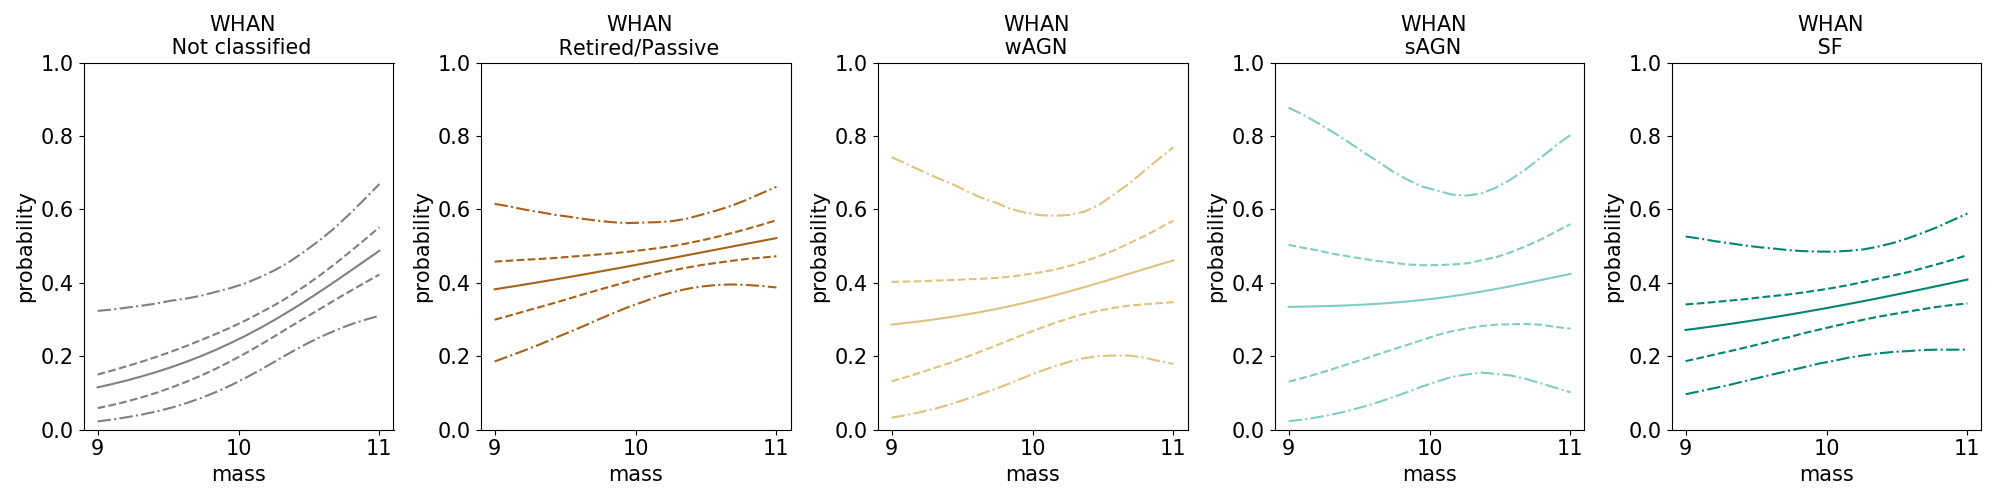

In [32]:
rows     = 1
cols     = probs_files.size
position = 0
plt.subplots(figsize=figsize)
for i in range(cols):
    prob_temp      = pd.read_csv(os.path.join(probs_path, probs_files[i]))
#     data_slice_idx = np.where((prob_temp['LOG_STELLAR_MASS'].values>=stellar_mass_ini)*
#                               (prob_temp['LOG_STELLAR_MASS'].values<=stellar_mass_fin))
    data_slice_idx = np.where(prob_temp['Z'].values==prob_temp['Z'].values[10])
    redshift = prob_temp['Z'].values[data_slice_idx]
    mass     = prob_temp['LOG_STELLAR_MASS'].values[data_slice_idx]
    mean     = prob_temp['mean'].values[data_slice_idx]
    perc025  = prob_temp['2.5%'].values[data_slice_idx]
    perc250  = prob_temp['25%'].values[data_slice_idx]
    perc500  = prob_temp['50%'].values[data_slice_idx]
    perc750  = prob_temp['75%'].values[data_slice_idx]
    perc975  = prob_temp['97.5%'].values[data_slice_idx]
    position+=1
    plot = plt.subplot(rows, cols, position)
    plt.plot(mass, mean, '-', color=palette[i])
    plt.plot(mass, perc025, '-.', color=palette[i])
    plt.plot(mass, perc250, '--', color= palette[i])
    plt.plot(mass, perc750, '--', color=palette[i])
    plt.plot(mass, perc975, '-.', color=palette[i])
    plt.title("$\,$ WHAN \n %s" % whan_classes[i], fontsize=fontsize)
    plt.xlabel("mass", fontsize=fontsize)
    plt.ylabel("probability", fontsize=fontsize)
    plt.tick_params('both', labelsize=fontsize)
    plt.ylim(ylim)
plt.tight_layout()
plt.savefig(os.path.join(figs_path, 'probs_temp_mass.png'))
plt.show()

In [17]:
np.unique(prob_temp['Z'].values)

array([0.06794   , 0.08269579, 0.09745158, 0.11220737, 0.12696316,
       0.14171895, 0.15647474, 0.17123053, 0.18598632, 0.20074211,
       0.21549789, 0.23025368, 0.24500947, 0.25976526, 0.27452105,
       0.28927684, 0.30403263, 0.31878842, 0.33354421, 0.3483    ])

<IPython.core.display.Javascript object>


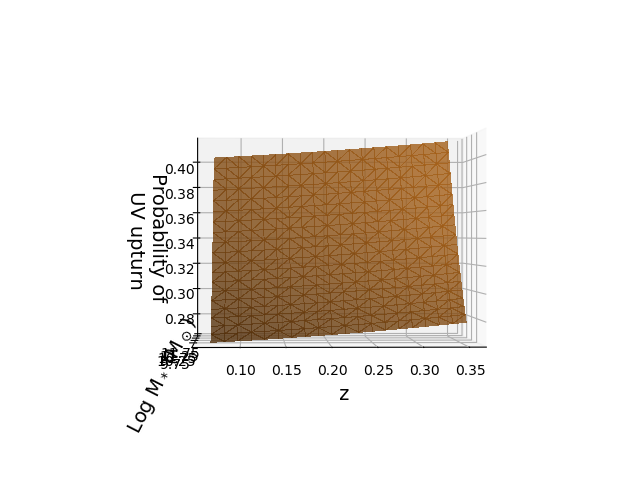

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_trisurf(prob_temp['Z'], prob_temp['LOG_STELLAR_MASS'], prob_temp['mean'], color='#a6611a', alpha=0.8, linewidth=0, antialiased=False)
# ax.plot_trisurf(prob_temp['Z'], prob_temp['LOG_STELLAR_MASS'], prob_temp['25%'], color='#a6611a', alpha=0.6, linewidth=0, antialiased=False)
# ax.plot_trisurf(prob_temp['Z'], prob_temp['LOG_STELLAR_MASS'], prob_temp['75%'], color='#a6611a', alpha=0.6, linewidth=0, antialiased=False)
ax.set_xlabel("\n z", fontsize=14)
ax.set_ylabel("\n Log M$_*$ (M$_\odot$)", fontsize=14)
ax.set_zlabel("\n Probability of \n UV upturn", fontsize=14)
for t in ax.yaxis.get_major_ticks(): t.label.set_fontsize(10)
ax.set_yticks([9.75, 10.25, 10.75, 11.25, 11.75])
ax.view_init(elev=22., azim=315)
# ax.zaxis.set_rotate_label(False)
# plt.savefig('./../../Figs/logit3D_grid.pdf', dpi=100)

# for ii in xrange(180,360,10):
#     ax.view_init(elev=10., azim=ii)
#     plt.savefig("./Results/movie_short/movie_0%d_0.png" % ii)
    
plt.savefig(os.path.join(figs_path, '3d_rm_sharedprior.png'))

plt.show()